In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictor import generate_data, load_csvdata, lstm_model

ImportError: No module named tensorflow

In [4]:
LOG_DIR = './ops_logs'
TIMESTEPS = 5
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [2]:
store = pd.HDFStore('../data/base_store.h5')
base = store['base'] 

In [8]:
keep_vars = ['code', 'swing','turn','vol','amount','low','high','open','close','mkt_cap']
rnn_base = base[keep_vars]
rnn_base = rnn_base[rnn_base.code=='000001.sz']
rnn_base = rnn_base.close

In [9]:
X, y = load_csvdata(rnn_base, TIMESTEPS, seperate=False)

In [12]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), 
                                      n_classes=0,
                                      verbose=1,  
                                      steps=TRAINING_STEPS, 
                                      optimizer='Adagrad',
                                      learning_rate=0.03, 
                                      batch_size=BATCH_SIZE)

INFO:tensorflow:Using temporary folder as model directory: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpf3ovf1ep
INFO:tensorflow:Using temporary folder as model directory: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmpf3ovf1ep


In [13]:
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)

In [14]:
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Training steps [0,100000)
INFO:tensorflow:Training steps [0,100000)
INFO:tensorflow:Step 1: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 74.5286
INFO:tensorflow:Step 1: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 74.5286
INFO:tensorflow:training step 100, loss = 0.40366 (0.002 sec/batch).
INFO:tensorflow:training step 100, loss = 0.40366 (0.002 sec/batch).
INFO:tensorflow:Step 101: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.563186
INFO:tensorflow:Step 101: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.563186
INFO:tensorflow:training step 200, loss = 0.09729 (0.002 sec/batch).
INFO:tensorflow:training step 200, loss = 0.09729 (0.002 sec/batch).
INFO:tensorflow:Step 201: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.128257
INFO:tensorflow:

TensorFlowEstimator(continue_training=False, clip_gradients=5.0, n_classes=0, verbose=1, class_weight=None, steps=100000, optimizer=Adagrad, learning_rate=0.03, batch_size=100, params=None)

In [15]:
predicted = regressor.predict(X['test'])
mse = mean_absolute_error(y['test'], predicted)
print ("Error: %f" % mse)

INFO:tensorflow:Loading model from checkpoint: ./ops_logs/model.ckpt-2000-?????-of-00001.
INFO:tensorflow:Loading model from checkpoint: ./ops_logs/model.ckpt-2000-?????-of-00001.


Error: 0.055976


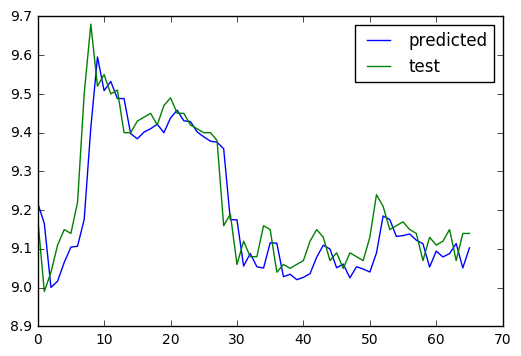

In [16]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])